## Company Introduction:
This python portfolio stresses about the Apprentice chef Inc is an innovative and unique company of its style which turns a different idea of cooking from home which concentrates on the target audience who are busy with their work schedules or doesn’t know cooking, they project wide variety of daily and simple home cooked meals delivered to the respected customer doorsteps within 30 minutes, promising clean and safe food. These orders are made through the company user friendly internet platform and the mobile applications.

## Our Goal:
 The company mission is to support the immerse routine of the working professionals with some healthy, tasty meals according to their dietary preferences, and by increasing the marketing strategies for the master cooking classes to develop the skill of cooking. so, as a business analyst my goal for the company would be to increase the profits by analyzing different factors which effect the revenue and working on benefiting those factors to improve the revenue and give the strategic insights.

## Customer Data Insights:
There are around 2000 customers which we need to concentrate, these customers meet the criteria of ordering the food at least one purchase per month with the pattern followed for 11 months in their first year of launch and one order/ quarter for 15 throughout the year. The platform is very authentic as the new customers go through several privacy precautions by registering through the code, allergies, dietary restrictions, and the old customers update and confirm their meals schedule and give feedback for the betterment.

In [216]:
# importing libraries
import pandas as pd                  #data analysis package
import matplotlib.pyplot as plt      #plotting the data
import seaborn as sns                 
import numpy as np                    # mathematical calculations 
import statsmodels.formula.api as smf # regression modeling and analysis


# importing machine learning models
from sklearn.tree     import DecisionTreeRegressor     # REGRESSION DECISION trees
from sklearn.ensemble import RandomForestRegressor     # importing random forest package
from sklearn.ensemble import GradientBoostingRegressor 

import sklearn.linear_model # linear modeling in scikit-learn

# importing machine learning tools
from sklearn.model_selection import train_test_split # train-test split
from sklearn.tree import plot_tree                   # tree plots

# setting pandas print options
pd.set_option('display.max_rows', 500) #setting the default for the number of rows and columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './__datasets/Apprentice_Chef_Dataset_2023.xlsx' #imported dataset excel file from local
Chef_Data = pd.read_excel(file) #reading the file

# displaying the first ten rows of the dataset
Chef_Data.head(n = 10)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174
5,2917.5,Rollam Westerling,rollam.westerling@jnj.com,Rollam,Westerling,246,7,1,2,240.3,1,5,1,20,0,240.90,8,4.473684,16
6,3901.5,Utt,utt@passport.com,Utt,Utt,316,10,1,5,183.8,2,5,2,46,4,140.01,6,3.157895,584
7,5000.0,Bandy,bandy@aol.com,Bandy,Bandy,251,10,1,1,269.6,4,5,2,40,0,143.00,8,2.894737,1095
8,3090.0,Rickard Karstark,rickard.karstark@live.com,Rickard,Karstark,256,7,1,5,218.4,2,6,1,30,0,120.34,6,2.894737,198
9,5745.0,Androw Frey,androw.frey@protonmail.com,Androw,Frey,297,8,1,6,266.8,1,6,1,32,0,140.88,8,2.894737,664


In [217]:
Chef_Data.tail(n = 15) #checking the last 15 rows of the dataset

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
1931,2625.000,Tregar,tregar@gmail.com,Tregar,Tregar,71,7,10,10,149.5,3,6,3,23,7,58.0,6,2.894737,128
1932,2938.250,Pyat Pree,pyat.pree@yahoo.com,Pyat,Pree,70,6,10,2,111.6,1,6,1,50,9,54.0,4,2.894737,196
1933,3136.000,Aegon III Targaryen,aegon.iii.targaryen@caterpillar.com,Aegon,III Targaryen,42,5,10,6,129.4,0,5,1,35,0,49.0,4,2.894737,88
1934,3645.250,Ambrode,ambrode@ibm.com,Ambrode,Ambrode,83,6,11,2,121.8,2,5,1,0,0,35.0,2,2.894737,14
1935,8715.000,Beth Cassel,beth.cassel@unitedhealth.com,Beth,Cassel,118,9,11,5,188.4,0,6,2,0,0,38.0,5,2.894737,296
1936,2800.000,Clifford Conklyn,clifford.conklyn@passport.com,Clifford,Conklyn,64,5,11,1,168.7,1,5,1,4,0,48.0,5,2.894737,9
1937,2712.500,Kirth Vance,kirth.vance@gmail.com,Kirth,Vance,70,4,12,7,143.6,2,5,2,9,0,59.0,6,2.894737,18
1938,2850.750,Lister,lister@gmail.com,Lister,Lister,65,4,12,8,157.3,2,6,2,13,0,38.0,6,2.894737,18
1939,2852.500,Olyvar Frey,olyvar.frey@gmail.com,Olyvar,Frey,110,7,12,3,104.0,0,6,1,10,0,48.0,4,2.894737,6
1940,5722.500,Sebaston Farman,sebaston.farman@cisco.com,Sebaston,Farman,57,7,12,1,223.2,2,6,2,0,0,52.0,6,2.894737,372


In [45]:
for attributes in Chef_Data: #printing the column names of the excel file imported
    print(attributes)
#printing the dataset dimensions displaying count of columns and values.
print(f"""
Values and Length of Dataset 
------------------------
Observations: {Chef_Data.shape[0]} 
Attribute_Names: {Chef_Data.shape[1]}
""")

REVENUE
NAME
EMAIL
FIRST_NAME
FAMILY_NAME
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
AVG_TIME_PER_SITE_VISIT
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
LATE_DELIVERIES 
AVG_PREP_VID_TIME
LARGEST_ORDER_SIZE
AVG_MEAN_RATING
TOTAL_PHOTOS_VIEWED

Values and Length of Dataset 
------------------------
Observations: 1946 
Attribute_Names: 19



## Insights from the Info and Describe functions of Data
The info() function used below provides a description of columns, including the number of non-null values, data types, memory usage, and the number of unique values for each column. This function is useful for getting a quick overview of the data structure and identifying any missing or incomplete data like the columns below have less or no null values.

The describe() provides descriptive statistics for numerical columns, it calculates a number of summary statistics, including count, mean, standard deviation, minimum, 25th, median (50th percentile), 75th percentile, and maximum. This function is useful for getting a quick understanding of the central tendency and spread of the chef data, we can understand that average meals ordered by the customer are 75 and the minimum orders the company get are 11.The average late deliveries is 2 which is less hence we can tell that based on the number of orders they are quick to deliver the meals as promised. The rating, feedback by the customers is avg of 3 and ax of 5 which is better scale.



In [46]:
# info about data and detailed explainantion about it.
Chef_Data.info(verbose = True)
#descriptive statistics for numeric data
Chef_Data.describe(include = 'number').round(decimals = 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15
std,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15
min,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00
25%,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00
50%,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00
75%,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00
max,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00


In [47]:
Chef_Data.isnull().sum(axis = 0) #checking the null values in the columns

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [48]:
Chef_Data.duplicated().sum() #checking if there any duplicates present.

0

In [49]:
# we saw in the before code that family name have 46 nulls so replacing the empties with 0
fill = 0
Chef_Data['FAMILY_NAME'] = Chef_Data['FAMILY_NAME'].fillna(fill) # fills 0 in place of nulls

Chef_Data.isnull().any().any() #checking if there are any nulls

False

## Feature Engineering
Till this step in the portfolio we have observed the loading the data,describing the statistics and dynamics of the data, cleaning of missing and duplicate values and got some insights about the apprentice chef data and its customers which inclines us towards feature engineering which is defined as transforming existing features in order to improve the performance of machine learning models using the techniques like normalizing data, aggregating, correlation, scaling and binning the values in categories using histogram, box-plot, tree map, imputation of missing and duplicate values etc will be followed below.

In [51]:
# creating a list of continuous and interval features (including Revenue for checking)
data = ["REVENUE",
        "AVG_TIME_PER_SITE_VISIT",
        "AVG_PREP_VID_TIME",
        "AVG_MEAN_RATING",
        "TOTAL_PHOTOS_VIEWED",
        "TOTAL_MEALS_ORDERED",
        "UNIQUE_MEALS_PURCH",
        "CONTACTS_W_CUSTOMER_SERVICE",
        "PRODUCT_CATEGORIES_VIEWED",
        "CANCELLATIONS_AFTER_NOON",
        "PC_LOGINS",
        "MOBILE_LOGINS",
        "WEEKLY_PLAN",
        "LATE_DELIVERIES ",
        "LARGEST_ORDER_SIZE"]


# developing a correlation matrix 
Chef_Data_corr = Chef_Data[data].corr(method = 'pearson')


# filtering the results to only show correlations 
Chef_Data_corr.loc[ : , "REVENUE"].round(decimals = 2).sort_values(ascending = False)


REVENUE                        1.00
AVG_TIME_PER_SITE_VISIT        0.64
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.46
LARGEST_ORDER_SIZE             0.44
CONTACTS_W_CUSTOMER_SERVICE    0.17
AVG_PREP_VID_TIME              0.14
UNIQUE_MEALS_PURCH             0.10
MOBILE_LOGINS                  0.07
PRODUCT_CATEGORIES_VIEWED      0.03
PC_LOGINS                      0.02
WEEKLY_PLAN                    0.01
CANCELLATIONS_AFTER_NOON       0.00
LATE_DELIVERIES               -0.02
AVG_MEAN_RATING               -0.55
Name: REVENUE, dtype: float64

## Insights from Correlation
From the above correlation performed we see that with respect to the revenue the highest correlation is with AVG_TIME_PER_SITE_VISIT which is 0.64 this means that on average, as the time spent per site visit increases, 
the revenue also tends to increase. Apart from this TOTAL_MEALS_ORDERED, TOTAL_PHOTOS_VIEWED  also effect the revenue hence we analyze these three variables with respect to the revenue for the further analysis for perfect prediction.

Apart from the positive effect we also see that negative correlation between revenue and LATE_DELIVERIES (-0.02) and AVG_MEAN_RATING (-0.55) suggests that as the number of late deliveries or the average mean rating decreases, the revenue tends to increase. Conversely, as the number of late deliveries or the average mean rating increases, the revenue tends to decrease.

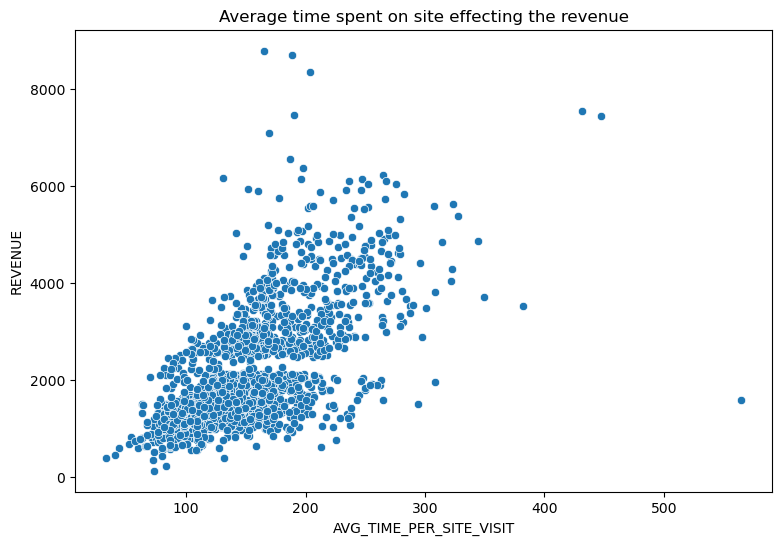

In [148]:
# setting size for plotting
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot(x    = 'AVG_TIME_PER_SITE_VISIT',
                y    = 'REVENUE',
                data = Chef_Data)


# displaying the results
plt.title(label   = "Average time spent on site effecting the revenue")
plt.show()

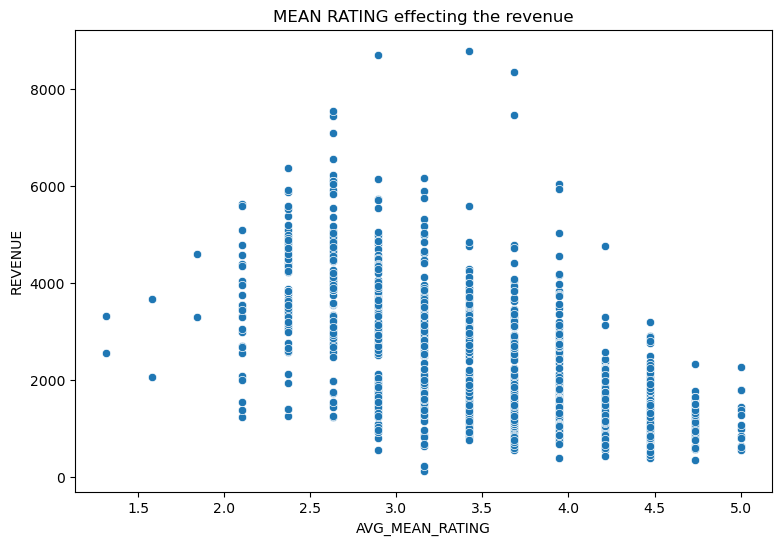

In [55]:
# setting the size of the scatter plot
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot(x    = 'AVG_MEAN_RATING',
                y    = 'REVENUE',
                data = Chef_Data)


# displaying the results negatively scattered
plt.title(label   = "MEAN RATING effecting the revenue")
plt.show()

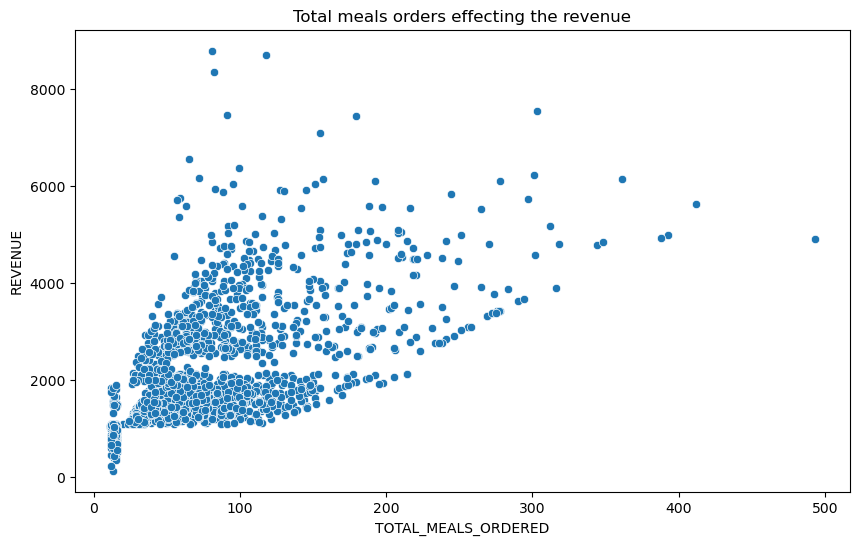

In [61]:
# figure size
fig, ax = plt.subplots(figsize = (10, 6))


# developing a scatterplot
sns.scatterplot(x    = 'TOTAL_MEALS_ORDERED',
                y    = 'REVENUE',
                data = Chef_Data)

# results
plt.title(label   = "Total meals orders effecting the revenue")
plt.show()

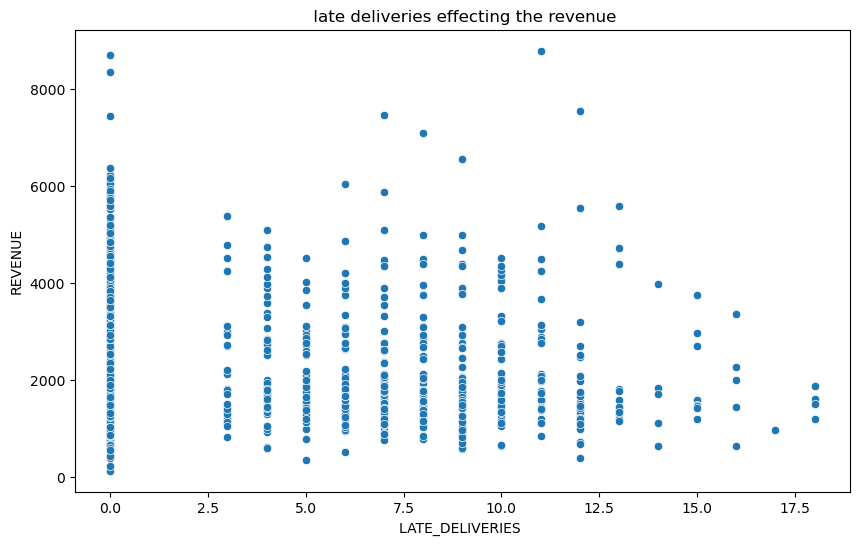

In [65]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 6))


# developing a scatterplot
sns.scatterplot(x    = 'LATE_DELIVERIES ',
                y    = 'REVENUE',
               data = Chef_Data)


# results
plt.title(label   = " late deliveries effecting the revenue")
plt.show()

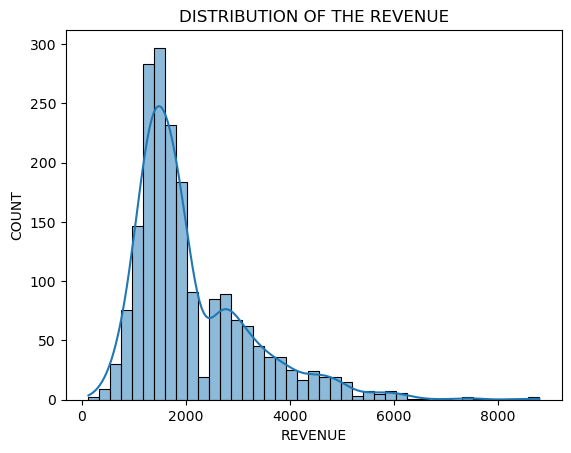

In [66]:
# creating a histogram
sns.histplot(data   = Chef_Data,
             x      = 'REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "DISTRIBUTION OF THE REVENUE")
plt.xlabel(xlabel = "REVENUE") 
plt.ylabel(ylabel = "COUNT")

# displaying results
plt.show()

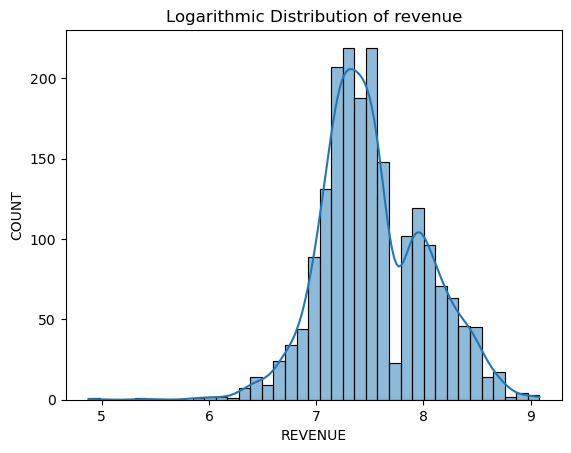

In [67]:
# log transforming revenue 
Chef_Data['log_REVENUE'] = np.log(Chef_Data['REVENUE'])
# developing a histogram using HISTPLOT
sns.histplot(data   = Chef_Data,
             x      = 'log_REVENUE',
             kde    = True)


# labels
plt.title(label   = "Logarithmic Distribution of revenue")
plt.xlabel(xlabel = "REVENUE") # avoiding using dataset labels
plt.ylabel(ylabel = "COUNT")

# displaying the histogram result 
plt.show()


From both the histogram we see that the log revenue distribution shows positively and equally distributed and skewed hence we will consider that for the further analysis of the data.The logarithmic transformation reduces the effect of outliers in the data. Outliers can greatly influence the shape of the histogram of the original data and often result in a skewed distribution. However, when the logarithmic transformation is applied, the effect of outliers is reduced, resulting in a more symmetrical distribution of the data, which is closer to a normal distribution.

<AxesSubplot:>

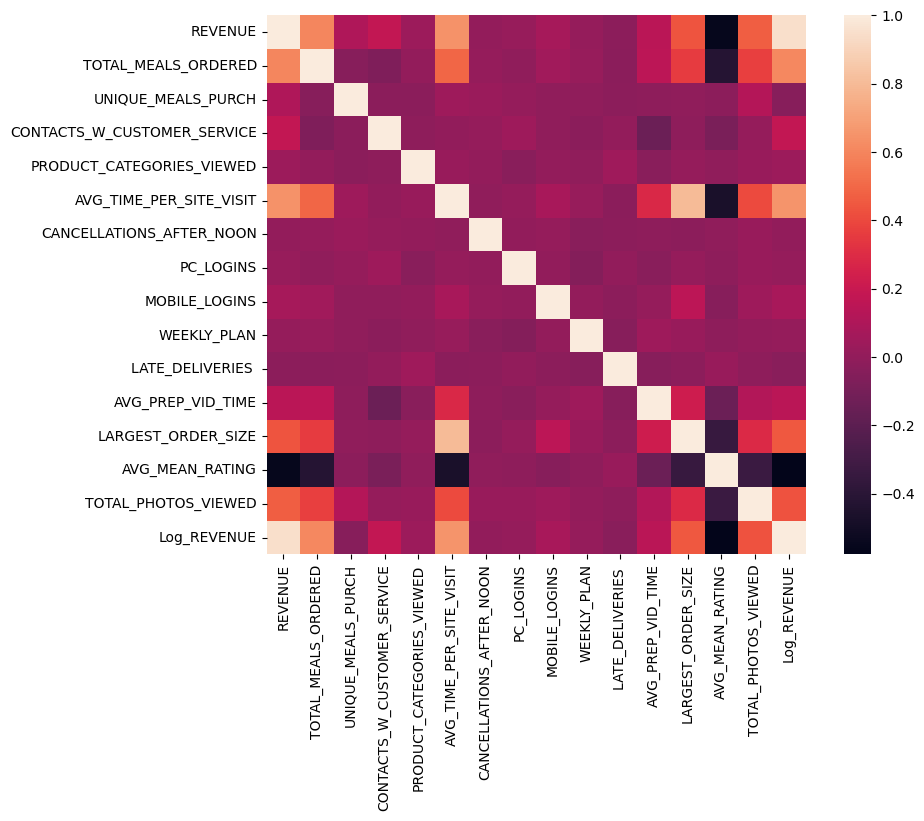

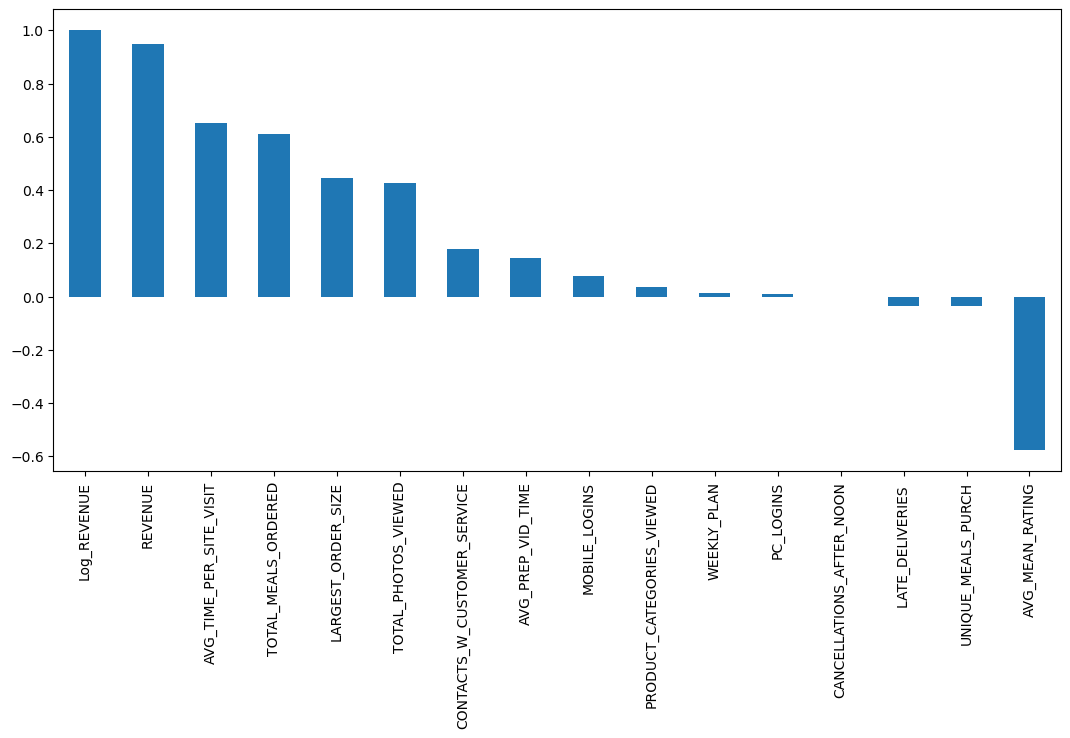

In [149]:
#Running correlation analysis between the variables to understand the significance of each x-variable over the y-variable

#correlation matrix
corrmat = Chef_Data.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, vmax=1, square=True)
plt.figure(figsize=(13,6))
Chef_Data.corr()['Log_REVENUE'].sort_values(ascending = False).plot(kind='bar')


## Insights from Heapmap and Plot

From the heat map significance lies in their ability to provide a visual representation of data that is easy to understand and interpret.hence from the above heat map we see that meals ordered and revenue are highly correlated
along with the meals order its correlated with the number of website visits. The average mean rating and the revenue is negatively correlated, less average mean more revenue.mean average rating is also negatively correlated with website visits inclining to the revenue which is the reactor variable, which is similar results to log_Revenue for the wide distribution.

In [218]:
#Dividing the dataset into two groups for log revenue and normal revenue for referenec.
# x-variables for normal y
x_var = [
        "AVG_TIME_PER_SITE_VISIT",
        "AVG_PREP_VID_TIME",
        "AVG_MEAN_RATING",
        "TOTAL_PHOTOS_VIEWED",
        "TOTAL_MEALS_ORDERED",
        "UNIQUE_MEALS_PURCH",
        "CONTACTS_W_CUSTOMER_SERVICE",
        "PRODUCT_CATEGORIES_VIEWED",
        "CANCELLATIONS_AFTER_NOON",
        "PC_LOGINS",
        "MOBILE_LOGINS",
        "WEEKLY_PLAN",
        "LATE_DELIVERIES ",
        "LARGEST_ORDER_SIZE"]


# x-variables for log y
x_var_log_y =[
        "AVG_TIME_PER_SITE_VISIT",
        "AVG_PREP_VID_TIME",
        "AVG_MEAN_RATING",
        "TOTAL_PHOTOS_VIEWED",
        "TOTAL_MEALS_ORDERED",
        "UNIQUE_MEALS_PURCH",
        "CONTACTS_W_CUSTOMER_SERVICE",
        "PRODUCT_CATEGORIES_VIEWED",
        "CANCELLATIONS_AFTER_NOON",
        "PC_LOGINS",
        "MOBILE_LOGINS",
        "WEEKLY_PLAN",
        "LATE_DELIVERIES ",
        "LARGEST_ORDER_SIZE"]
 

In [219]:
Chef_Data["Log_REVENUE"] = np.log(Chef_Data["REVENUE"]) #creating a new log revenue column for the analysis

## Train - Test Data
When machine learning model like regression is running, we divide the available data into two sets: training data and test data. The purpose of this division is to ensure that the model is able to generalize well to new, unseen data and adapt to the imported data. The training data is used to train the model. During training, the model is presented with input/output pairs from the training data, and the model learns to map inputs to outputs based on these examples. The test data is used to evaluate the model's performance.The gap provides a way to decide how well the model is generalized, less gap gives more adequate sets of data.

Here we divide the Chef_Data into train and test sets putting the y as revenue and state as 219.

In [228]:


# Preparing a DataFrame based the the analysis above
x_data = Chef_Data.loc[ : , x_var_log_y]


# preparing response variable
y_data      = Chef_Data.loc[ : , 'Log_REVENUE']

x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables 
            y_data, # y-variable 
            test_size    = 0.25,
            random_state = 219)

In [229]:
# Setting a model name with the type of regression
model_name = "Linear Regression"


# initiating the regression type
model = sklearn.linear_model.LinearRegression()


# preparing the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# displaying the reuslts  for train test and gap preparing the model.
model_train_score = model.score(x_train, y_train).round(4) 
model_test_score  = model.score(x_test, y_test).round(4)  
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6348
Testing Score  : 0.6389
Train-Test Gap : 0.0041


## Linear Regression and Ols Regression

ordinary least squares (OLS) regression analysis is a statistical method used to model the relationship between a dependent variable and independent variables. The dependent variable in this case is "Log_REVENUE" and the independent variables are various factors that could influence it. R-squared is a measure of how well the model fits the data, with a value of 0.639 in this case. An R-squared value of 0.639 means that 63.9% of the variance in the dependent variable (Log_REVENUE) can be explained by the independent variables. n defines the total observations in the dataset which is 1946. The model is based on intercept 7.6.

A train-test gap of 0.0041 means that the difference between the training score and the testing score is 0.0041. A small train-test gap is generally a good sign, as it means that the model is not over fitting to the training data and has a good level of generalization to unseen data. On the other hand, a large train-test gap may indicate that the model is over fitting to the training data and is not generalizing well to unseen data.

It's worth noting that a single score is not enough to fully evaluate the performance of a model. It is also important to consider other evaluation metrics, such as precision, recall, F1 score, and confusion matrix, to get a more comprehensive understanding of a model's performance.

In [230]:
# building a base modelling for the dataset

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """Log_REVENUE ~ AVG_TIME_PER_SITE_VISIT +
                                                AVG_PREP_VID_TIME +
                                                AVG_MEAN_RATING +       
                                                TOTAL_PHOTOS_VIEWED +
                                                TOTAL_MEALS_ORDERED +
                                                UNIQUE_MEALS_PURCH +
                                                CONTACTS_W_CUSTOMER_SERVICE +
                                                PRODUCT_CATEGORIES_VIEWED +
                                                CANCELLATIONS_AFTER_NOON +
                                                PC_LOGINS +
                                                MOBILE_LOGINS +
                                                WEEKLY_PLAN +
                                                LARGEST_ORDER_SIZE 
                                                
 """,
                                                data = Chef_Data)


# making the kernal to fit the data
results = lm_practice.fit()


# printing results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Log_REVENUE   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     262.8
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:27:52   Log-Likelihood:                -372.52
No. Observations:                1946   AIC:                             773.0
Df Residuals:                    1932   BIC:                             851.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [231]:
# importing package
import statsmodels.api as smf # predictive modeling with nice outputs

# Step 1: INSTANTIATE 

lm_best = smf.OLS(y_train, x_train).fit()

# Step 2: analyze the SUMMARY output
print(lm_best.summary())

                                 OLS Regression Results                                
Dep. Variable:            Log_REVENUE   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          1.700e+04
Date:                Sun, 12 Feb 2023   Prob (F-statistic):                        0.00
Time:                        17:27:57   Log-Likelihood:                         -1289.1
No. Observations:                1459   AIC:                                      2606.
Df Residuals:                    1445   BIC:                                      2680.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [232]:
# using and showing this code on the porfolio just for the reference not using this model for analysis.
# Setting a model name
model_name = "Lasso Regression"


# initiating the model
model = sklearn.linear_model.Lasso()


# training data
model_fit = model.fit(x_train, y_train)


# discovering the new data by test
model_pred = model.predict(x_test)


# results
model_train_score = model.score(x_train, y_train).round(4) 
model_test_score  = model.score(x_test, y_test).round(4)   
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.5502
Testing Score  : 0.5203
Train-Test Gap : 0.0299


## regression tree and random forest
A decision tree is a supervised learning algorithm used for regression.It is a tree-like model that represents a series of decisions and their possible consequences. Each internal node in the tree represents a "test" on an input feature, each branch represents the outcome of the test, and each leaf node represents a class label or a prediction.

The goal of the decision tree is to predict the class label or value of the target variable based on the values of input features, by recursively partitioning the data into subsets based on the tests at the internal nodes
Random Forest is a combination of multiple decision trees, where each tree is trained on a random subset of the data and features. The predictions from individual trees are combined through a majority vote or averaging to produce a final prediction. Random Forest is useful because it addresses some of the limitations of individual decision trees, such as high variance by training multiple trees and combining their predictions. The combination of many trees makes Random Forest less prone to over fitting and provides more accurate predictions compared to single decision trees.

Comparing the both regression tree models the tuned logistic regression with decision tree gives more ideal train and test set splits with minimum gap in both models the best model is Training Score : 0.7484, Testing Score : 0.6902 and the random forest value shows more accurate results compared to decision tree hence we consider that values for the further discussion which shows Training Score : 0.7673, Testing Score : 0.7494, Train-Test Gap : 0.0179 which is ideal with the chart displaying the important factors effecting the log revenue , the high effect or relation is showed by meals_ordered and avg time visits for the website, both of these need to be concentrated to improve revenue.



Training Score : 0.7058
Testing Score  : 0.6825
Train-Test Gap : 0.0233


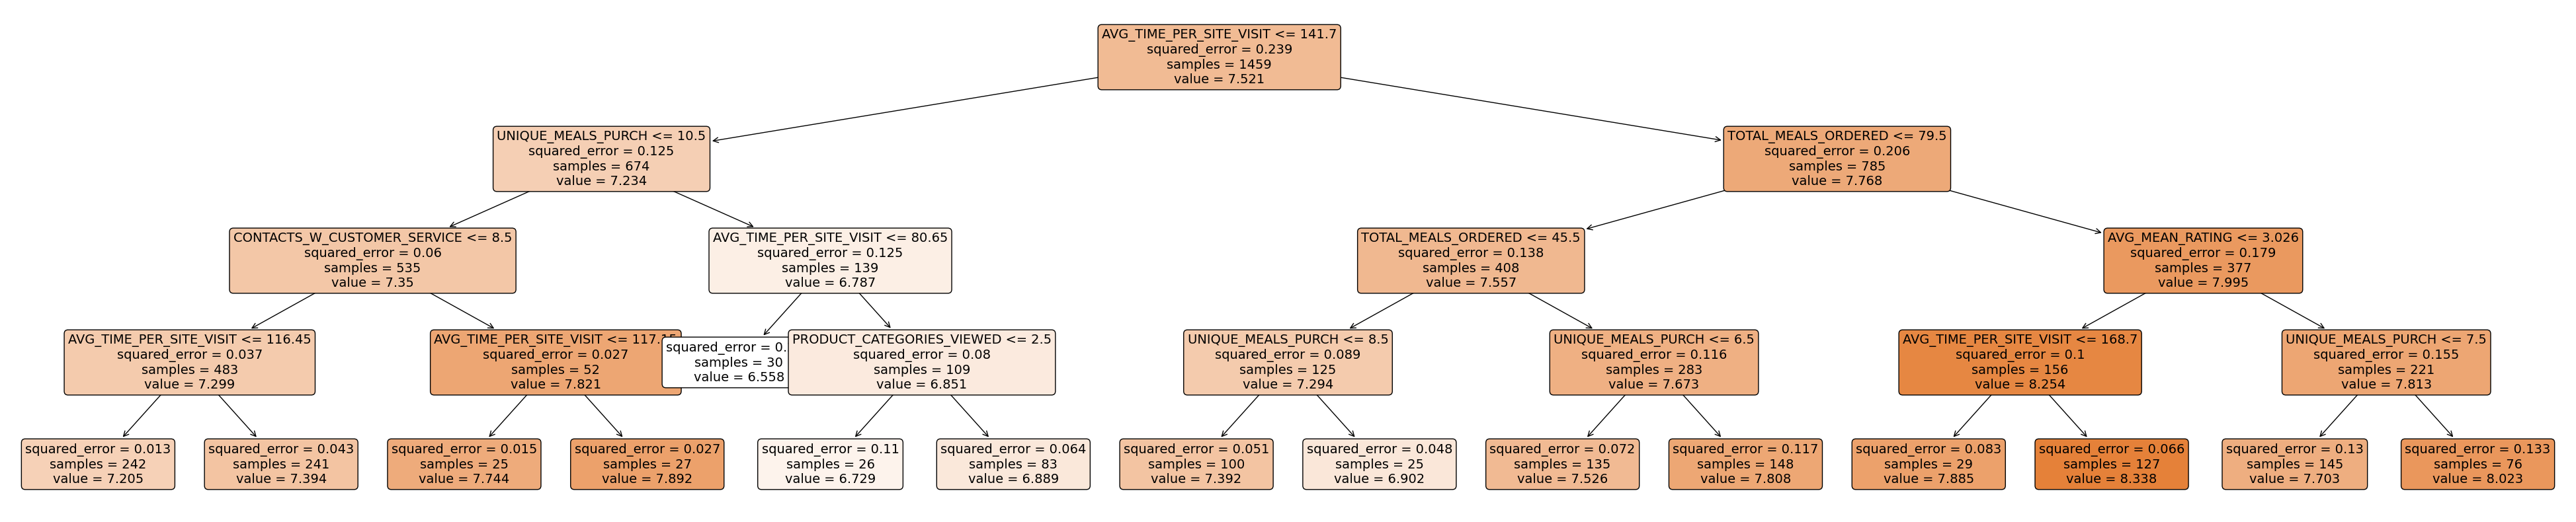

In [263]:
model_name = 'Regression Tree' #defining the model name

# INSTANTIATING 
model = DecisionTreeRegressor(max_depth        = 4, #depth of the tree
                              min_samples_leaf = 25, # min leafs divided data
                              random_state     = 219)


# mobilising the training data
model_fit = model.fit(x_train, y_train)


# predition on new data
model_pred = model.predict(x_test)


# results
model_train_score = model.score(x_train, y_train).round(4) 
model_test_score  = model.score(x_test, y_test).round(4)  
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

# setting size
plt.figure(figsize=(50, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = model, # changing to pruned_tree_fit
          feature_names = x_train.columns,
          filled        = True, #filling the leafs
          rounded       = True, 
          fontsize      = 14) #putting the font of the data as 14


# rendering the plot
plt.show() #showing the plot of the tree

In [234]:
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

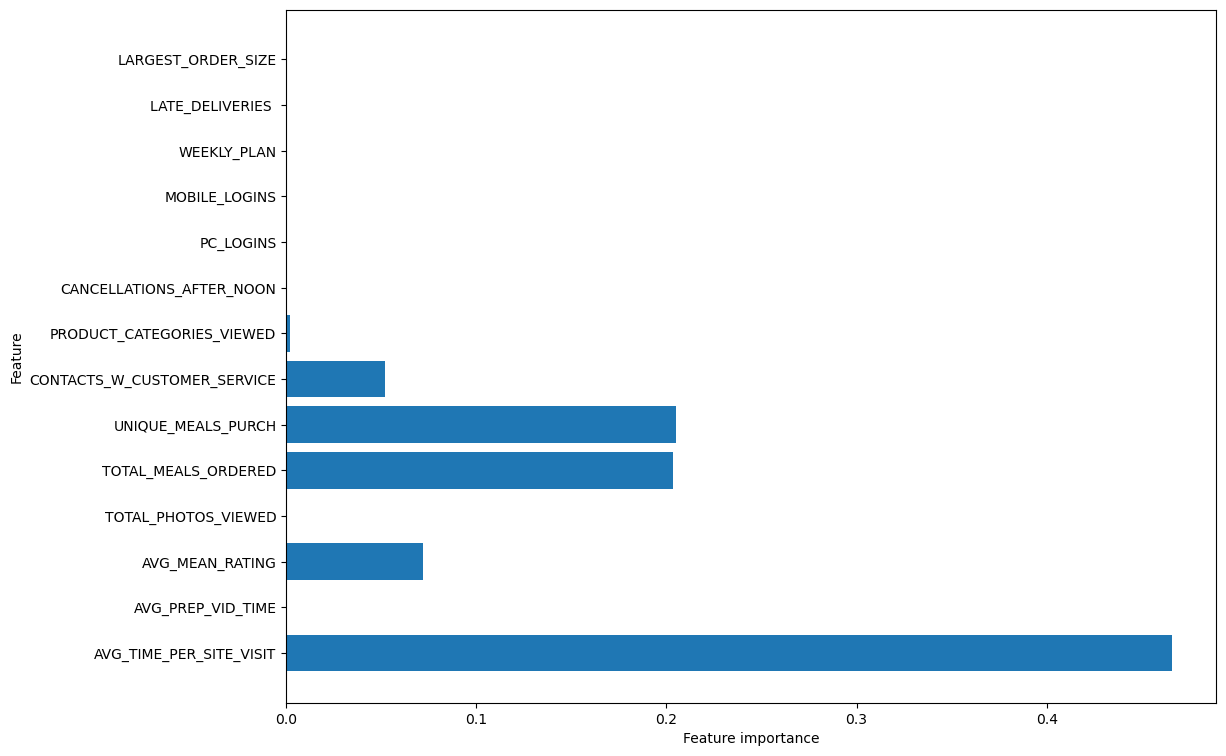

In [235]:
plot_feature_importances(model,
                         train = x_train,
                         export = False)

In [259]:

model_name = 'Decision_Tree'
# a logistic regression model with tuned values
model = DecisionTreeRegressor(splitter         = 'best',
                              min_samples_leaf = 25,
                              max_depth        = 10,
                              criterion        = 'mae',
                              random_state     = 219)


# dividing the data into test and train
model_fit = model.fit(x_train, y_train)


# predicting the values based on the model
model_pred = model.predict(x_test)


# modelling the results
dt_model_train_score = model.score(x_train, y_train).round(4) # using R-square
dt_model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
dt_model_gap         = abs(dt_model_train_score - dt_model_test_score).round(4)


# displaying results
print('Training Score :', dt_model_train_score)
print('Testing Score  :', dt_model_test_score)
print('Train-Test Gap :', dt_model_gap)

/Users/nithishkittu/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


Training Score : 0.7484
Testing Score  : 0.6902
Train-Test Gap : 0.0582


In [260]:
# model name
model_name = 'Random Forest'


# a random forest model with default values
model = RandomForestRegressor(n_estimators     = 100,
                              criterion        = 'mse',
                              max_depth        = 4,
                              min_samples_leaf = 19,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)


# training data
model_fit = model.fit(x_train, y_train)


#testing set
model_pred = model.predict(x_test)


# results model
rf_model_train_score = model.score(x_train, y_train).round(4) # using R-square
rf_model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
rf_model_gap         = abs(rf_model_train_score - rf_model_test_score).round(4)


# printing results
print('Training Score :', rf_model_train_score)
print('Testing Score  :', rf_model_test_score)
print('Train-Test Gap :', rf_model_gap)

/Users/nithishkittu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Training Score : 0.7673
Testing Score  : 0.7494
Train-Test Gap : 0.0179


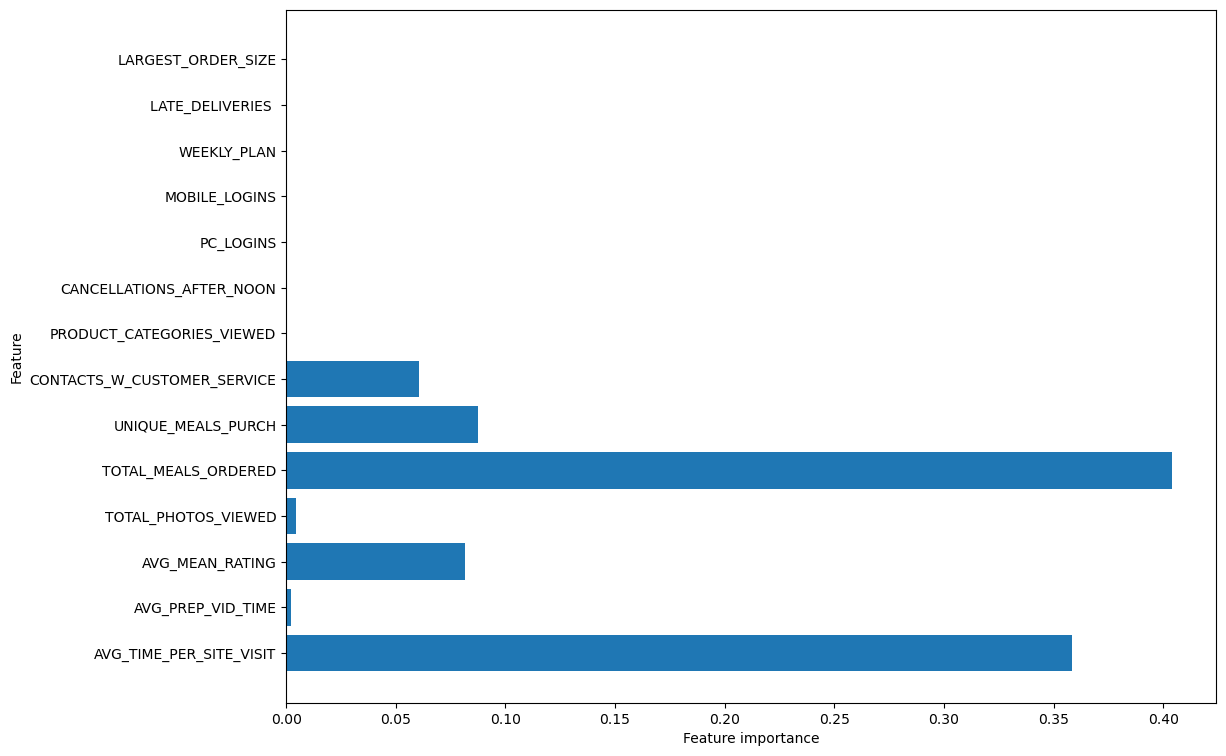

In [238]:
# plotting feature importance
plot_feature_importances(model          ,
                         train = x_train,
                         export = False )

Comparing the both regression tree models the tuned logistic regression with decision 
tree gives more ideal train and test set splits with minimum gap in both models the best model is Training Score : 0.7484, Testing Score  : 0.6902 and the random forest value shows more accurate results compared to decision tree hence we consider that values for the further discussion which shows Training Score : 0.7673, Testing Score : 0.7494, Train-Test Gap : 0.0179 which is ideal with the chart displaying the important factors effecting the log revenue , the high effect or relation is showed by meals_ordered and avg time visits for the website, both of these need to be concentrated to improve revenue.

In [249]:
# model name gradient boosting machine learning model
Model_name = 'GBM'


# model object 
model = GradientBoostingRegressor(loss          = 'ls',
                                  learning_rate = 0.1, #rate of leaning the ml model data
                                  n_estimators  = 100,
                                  criterion     = 'friedman_mse',
                                  max_depth     = 2,
                                  warm_start    = False,
                                  random_state  = 219) #declaring the randome state


# training data is fitted to x and y
model_fit = model.fit(x_train, y_train)


# prediction of results based on the testing set
model_pred = model.predict(x_test)


# results
model_train_score = model.score(x_train, y_train).round(4) 
model_test_score  = model.score(x_test, y_test).round(4)   
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

/Users/nithishkittu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Training Score : 0.8527
Testing Score  : 0.8082
Train-Test Gap : 0.0445


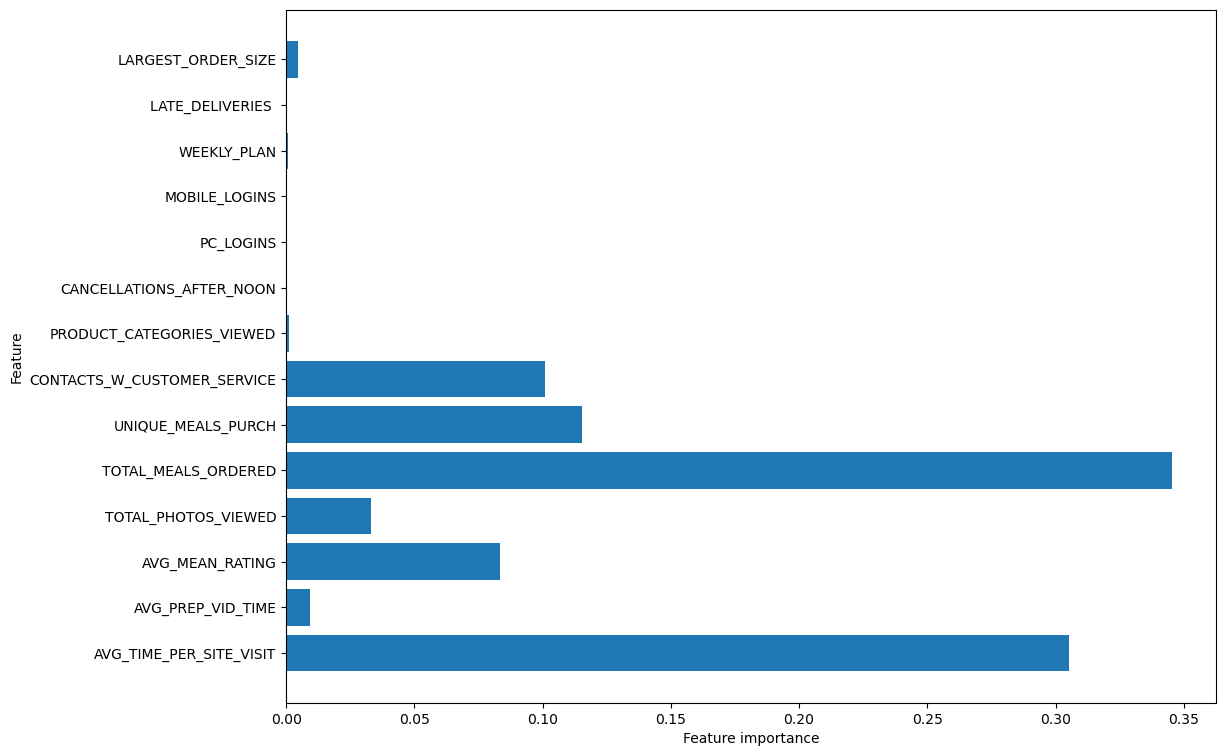

In [240]:
plot_feature_importances(model, #creating the plot for highling the important clumns respected to revenue data
                         train = x_train,
                         export = False)

## Best Model: Gradient Boosting 

Gradient Boosting Regressor (GBR) is for regression problems. It is an ensemble technique that combines multiple simple models, such as decision trees, to form a more powerful and robust prediction model. The algorithm works by sequentially adding trees to the model, where each tree aims to correct the mistakes made by the previous tree. The learning procedure involves adjusting the weights of instances in the training set based on the errors made by the current model. 

model_train_score is the R^2 score on the training set, which measures the goodness of fit of the model on the training data. A score of 0.8527 means that the model can explain 85.27% of the variation in the target variable (y) log revenue based on the predictor variables (x) which are the list in the training set.




In [262]:
#initialising and printing the dynamic model displaying the best regression model.

print(f"""
Best_Model :  GBM    
Train_Score : {model_train_score}           
Test_Score  : {model_test_score}         
Train-Test_Gap :{model_gap}

--- if also want to see 2nd best model then --

2nd_Best_Model : Random_Forest   
Train_Score :  {rf_model_train_score}           
Test_Score  :  {rf_model_test_score}         
Train-Test_Gap:{rf_model_gap}
""")


Best_Model :  GBM    
Train_Score : 0.8527           
Test_Score  : 0.8082         
Train-Test_Gap :0.0445

--- if also want to see 2nd best model then --

2nd_Best_Model : Random_Forest   
Train_Score :  0.7673           
Test_Score  :  0.7494         
Train-Test_Gap:0.0179



## Conclusion

Finally when all the models ran the best regressor model we found is gradient boosting is the ideal one with r2 value above 80% which shows the variability of revenue with the x values, the highest correlation is for meals ordered and the gap is 0.04 which is 4% difference in both sets performance, and avg time per site visited which effects the revenue more hence we should work on these two attributes.



